# The Classic Iris Dataset


Dataset Information:

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

Attribute Information:

    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal width in cm
    5. class:
        - Iris-Setosa
        - Iris-Versicolor
        - Iris-Virginica

# Notebook Setup

In [10]:
#standard imports
import os

#Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [11]:
sns.set()

# Load Dataset

In [16]:
#Load the Iris dataset
iris = datasets.load_iris()

In [18]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# The Problem to be Solved
The aim of this project is to develop a perceptron learning model using the first 100 class labels of the iris dataset.

    - The Iris dataset has three classes: 0, 1, and 2, corresponding to the species Setosa, Versicolor, and Virginica.

    - Only the first 100 samples, which include the classes Setosa (class label 0) and Versicolor (class label 1), need to be extracted.
    
    - The task is to keep only these two classes and ensure they are labeled as 0 and 1.

In [21]:
# Extract the first 100 data points (which belong to Setosa and Versicolor)
X = iris.data[:100]  # The features
y = iris.target[:100]  # The corresponding class labels

# Convert y (class labels) into a pandas DataFrame
y_df = pd.DataFrame(y, columns=['class_label'])

# Assign the NumPy representation of the class labels using the .values method
y_vector = y_df['class_label'].values

# Print the resulting NumPy array
print(y_vector)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Exploratory Data Analysis
This involves analyzing and visualizing the dataset to uncover patterns, trends, relationships, and anomalies without making formal assumptions. It helps in understanding the structure of the data, guiding feature selection, and shaping the approach for further modeling and analysis.

DataFrame Creation

In [26]:
# Extract the first column (sepal length) and third column (petal length)
X_selected = X[:, [0, 2]]  # First (sepal length) and third (petal length) columns

# Create a DataFrame with sepal length and petal length
X_df = pd.DataFrame(X_selected, columns=['sepal_length', 'petal_length'])

# Add the target column (numeric labels)
X_df['target'] = y

# Map the target values to species class names
species_mapping = {0: 'Setosa', 1: 'Versicolor'}
X_df['species'] = X_df['target'].map(species_mapping)

# Display the first few rows of the DataFrame
print(X_df.head())

   sepal_length  petal_length  target species
0           5.1           1.4       0  Setosa
1           4.9           1.4       0  Setosa
2           4.7           1.3       0  Setosa
3           4.6           1.5       0  Setosa
4           5.0           1.4       0  Setosa


Visualization

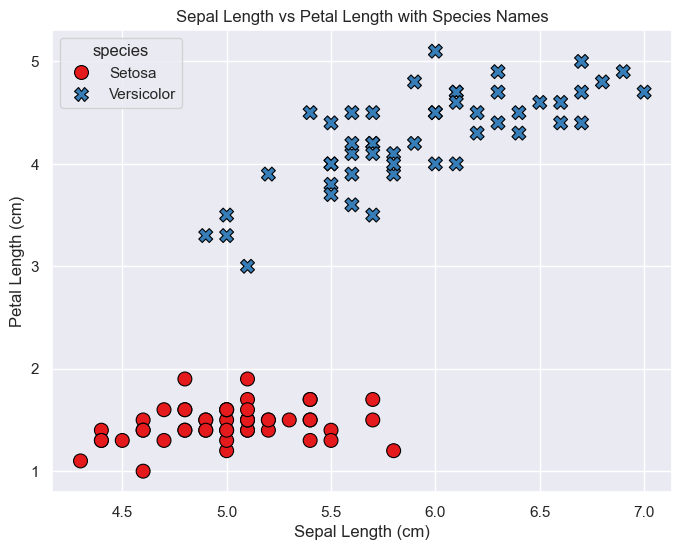

In [27]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_df, x='sepal_length', y='petal_length', hue='species', style='species', palette='Set1', s=100, edgecolor='black')

# Set plot labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length with Species Names')

# Show the plot
plt.show()

Sepal Length vs Target

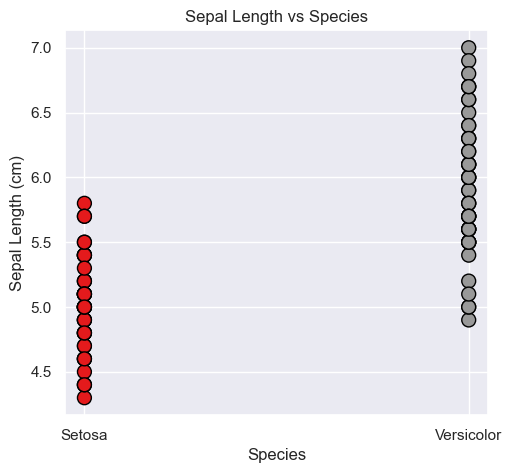

In [32]:
plt.figure(figsize=(12, 5))

# Plot 1: Sepal Length vs Target (Species)
plt.subplot(1, 2, 1)
plt.scatter(X_df['species'], X_df['sepal_length'], c=X_df['target'], cmap='Set1', s=100, edgecolor='black')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length vs Species')

# Adjust layout and display plots
plt.show()


Petal Length vs Target

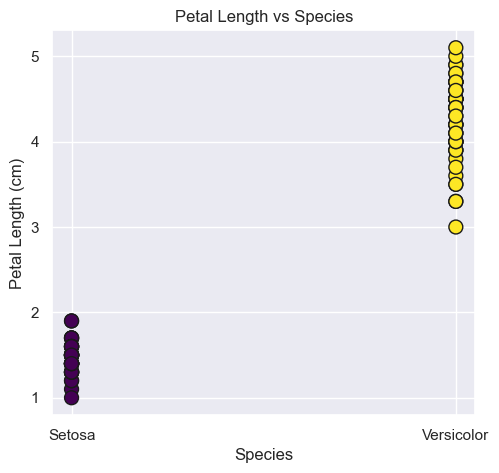

In [34]:
plt.figure(figsize=(12, 5))

# Plot 2: Petal Length vs Target (Species)
plt.subplot(1, 2, 2)
plt.scatter(X_df['species'], X_df['petal_length'], c=X_df['target'], cmap='viridis', s=100, edgecolor='k')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.title('Petal Length vs Species')

# Adjust layout and display plots
plt.show()

From above, it can be seen that the features of the Iris-setosa can easily be differentiated from that of the Iris-versicolor, as is clearly shown in the petal length vs target plot. This means that these two classes of the Iris Dataset are linearly separable. Hence, the step function is an ideal activation function for the development of the perceptron class.

# Developing the Perceptron Class

In [35]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def activation(self, z):
        """ Step activation function. Returns 1 if z >= 0, else 0 """
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        """ Train the perceptron on the dataset X and target labels y """
        n_samples, n_features = X.shape
        
        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop (for each epoch)
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                # Linear combination of weights and input features + bias
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Get prediction using activation function
                y_pred = self.activation(linear_output)
                
                # Perceptron update rule
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i  # Update the weights
                self.bias += update           # Update the bias

    def predict(self, X):
        """ Predict the class label for input X """
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)



# Model Training

In [39]:
# Initialize the Perceptron model
perceptron = Perceptron(learning_rate=0.01, n_iterations=10)

# Train the Perceptron model
perceptron.fit(X, y)

# Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
# Make predictions on the training data
predictions = perceptron.predict(X)

# Print the predicted labels and the true labels
print("Predicted labels:", predictions)
print("True labels:     ", y)

Predicted labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
True labels:      [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [41]:
# Accuracy Evaluation
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y, predictions, target_names=['Setosa', 'Versicolor'])
print("Classification Report:")
print(report)

Accuracy: 100.00%
Confusion Matrix:
[[50  0]
 [ 0 50]]
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

